# Описание

Данная тетрадка содержит в себе первое задание по компьютерному практикуму по экономике. Вам предстоит освоить ряд важных библиотек для Python, изучить основы Latex, а также создать экономические модели.

Все задания связаны с моделями бюджетных ограничений и предпочтений. 
* В первой модели существуют только два товара определенной цены. 
* Во второй модели определены 3 параметра: название, цена и количество товара, которое потребитель может получить бесплатно. За товар сверх этого количества необходимо заплатить указанную цену.
* В третьей модели для каждого товара есть порог количества. Товар в количестве ниже данного порога стоит одну цену, а каждая единица товара выше этого порога стоит другую цену.

Ожидается, что Вы разберетесь в представленных примерах и по их образцу сделаете более сложные задания. Также стремитесь к тому, чтобы Ваш код и Ваши пояснения были понятными. При необходимости комментируйте код и оставляйте заметки в текстовых полях.

## Баллы

За каждое задание начисляется определенное количество баллов. Если задание решено не полностью, то за него может быть начислена только часть баллов.

|№ Задания|Балл|
|---|---|
|[Задание 1](#task_1)|0.5|
|[Задание 2](#task_2)|0.5|
|[Задание 3](#task_3)|0.5|
|[Задание 4](#task_4)|0.5|
|[Задание 5](#task_5)|1|
|[Задание 6](#task_6)|0.5|
|[Задание 7](#task_7)|1|
|[Задание 8](#task_8)|1|
|[Задание 9](#task_9)|0.5|
|[Задание 10](#task_10)|0.5|
|[Задание 11](#task_11)|1|
|[Задание 12](#task_12)|1|
|[Задание 13](#task_13)|1.5|
|Всего|10|

## Импорт библиотек

In [1]:
# Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

# Модель 1

## Описание класса

В данной модели у каждого товара есть только два параметра: название и цена за единицу.

In [2]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, price):
        self.name = name
        self.price = price

## Проверка бюджетного ограничения

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [3]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
    Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100    
print(budget_test(g1, g2, budget, 1, 1))
print(budget_test(g1, g2, budget, 10, 10))
print(budget_test(g1, g2, budget, 100, 100))

1
0
-1


## Графическое представление

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку.

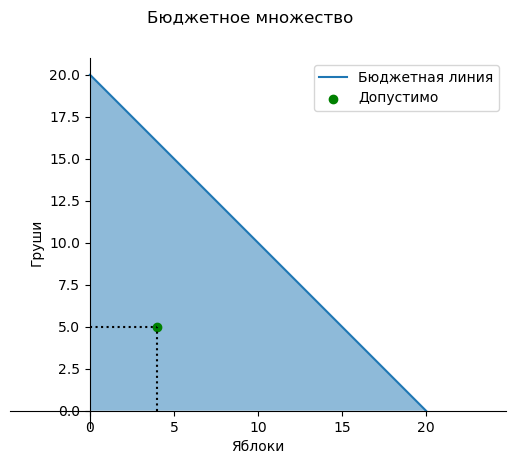

In [4]:

def plot_budget(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''
    
    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0)
    x_points = [0, budget/g1.price] 
    y_points = [budget/g2.price, 0]
    

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100   
plot_budget(g1, g2, budget, 4, 5);

## Интерактивное представление

In [5]:
# Интерактивный виджет
def interactive_plot(p1, p2, budget, x1, x2):
    g1 = Good("Яблоки", p1) # Создаем первый товар с ценой p1
    g2 = Good("Груши", p2) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x1, x2);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), x1 = (1,10), x2=(1,10));



interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

## Работа с таблицами

В данном разделе мы будем работать с таблицами. Вначале мы загрузим данные из Excel файла в датафрейм библиотеки pandas. Затем мы обработаем строки этой таблицы, и для каждой строки проверим, выполняется ли бюджетное ограничение, и результаты сохраним в новый датафрейм. Далее мы отфильтруем получившийся датафрейм по условию, что бюджетное ограничение выполняется (в том числе на границе). Результат мы отсортируем по размеру бюджета и сохраним в новый Excel файл.

Файл model1_data.xlsx должен находиться в том же каталоге, что и данная тетрадка. Файл можно скачать по [данной ссылке](http://samonenko.ru/upload/model1_data.xlsx).

In [6]:
df = pd.read_excel("model1_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм 
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant
0,Яблоки,5,Груши,5,50,5,5
1,Яблоки,5,Груши,5,51,5,5
2,Апельсины,5,Мандарины,5,49,5,5
3,Виоград,2,Малина,3,30,23,45
4,Виоград,2,Малина,3,30,6,8
5,Виоград,2,Малина,3,45,6,8


In [7]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов
    
    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price']) 
    g2 = Good(row['G2_name'], row['G2_price'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
2,Апельсины,5,Мандарины,5,49,5,5,-1
3,Виоград,2,Малина,3,30,23,45,-1
4,Виоград,2,Малина,3,30,6,8,-1
5,Виоград,2,Малина,3,45,6,8,1


In [8]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
5,Виоград,2,Малина,3,45,6,8,1


In [9]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
5,Виоград,2,Малина,3,45,6,8,1
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1


In [10]:
df_super.to_excel("model1_result.xlsx") # Сохраняем 

## Обратная задача

### Случай двух товаров

Решим обратную задачу, теперь мы должны узнать стоимости товаров, если известны точки, которые лежат на границе кривой бюджетных ограничений.

Пусть нам известно, что две точки $A_1 = (a_{1,1}, a_{1,2})$ и $A_2 = (a_{2,1}, a_{2,2})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 = b,$$ 
где $p_1$ -- цена единицы первого продукта, $p_2$ -- цена единицы второго продукта и $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2
\end{pmatrix}
= 
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} && a_{1,2} \\
        a_{2,1} && a_{2,2} 
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

In [11]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([2,1]) # Матрица 2x1 из единиц 

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение 
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [1,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,2],
    [2,2]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [2,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,1],
    [2,2]
]
print(get_goods_parameters(list_of_points))


[[0.33333333]
 [0.33333333]]
None
None
None


### Графическое представление

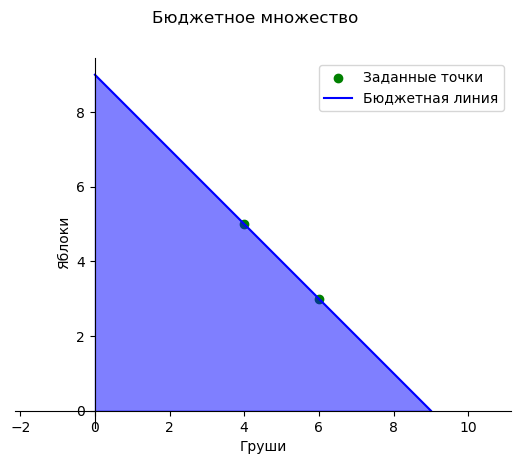

In [12]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")
            
    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters(list_of_points)
    if not (result is None):
        fig.suptitle("Бюджетное множество")
        g1 = Good("Груши", result[0][0])
        g2 = Good("Яблоки", result[1][0])
        budget = 1
        x_points = [0, budget/g1.price] 
        y_points = [budget/g2.price, 0]
        
        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5
       
         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [4,5],
    [6,3]
]


plot_goods_parameters(list_of_points)

### Интерактивное представление

In [13]:
# Интерактивный виджет
def interactive_plot(x11, x12, x21, x22):
    list_of_points = [
        [x11, x12],
        [x21, x22]
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

### Случай трех товаров

Отметим, что рассуждения и код практически не поменяются, если речь пойдет о трех товарах и трех точках в трехмерном пространстве.

Пусть нам даны три точки $A_1 = (a_{1,1}, a_{1,2}, a_{1,3})$, $A_2 = (a_{2,1}, a_{2,2}, a_{2,3})$ и $A_3 = (a_{3,1}, a_{3,2}, a_{3,3})$. Надо решить систему линейных уравнений:

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + p_3 a_{1,3}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + p_3 a_{2,3}= 1\\
p_1 a_{3,1} + p_2 a_{3,2} + p_3 a_{3,3}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
= 
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

In [14]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([3,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]]
None


### Случай $n$ товаров. <font color="red">Задание 1.</font> <a id="task_1"></a>

Реализуйте предыдущий пример для случая $n$ товаров. Вам надо написать поясняющий текст, используя $\LaTeX$, а также реализовать саму функцию.

Пусть нам даны $n$ точек $A_1 = (a_{1,1}, a_{1,2}, \dots ,a_{1,n})$, $A_2 = (a_{2,1}, a_{2,2}, \dots, a_{2,n})$, $\dots$, $A_n = (a_{n,1}, a_{n,2}, \dots, a_{n,n})$. Надо решить систему линейных уравнений: 

Заменим в исходном коде размер вектора $b$ из уравнения $Ax = b$, другие составляющие инвариантны размеру входной матрицы 

In [15]:
def get_goods_parameters(list_of_points: np.array):
    ones = np.ones([len(list_of_points) ,1])    #an array 'b' of correct size is created
     
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones    #find a solution if exists
    else:
        return None
    

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:    #check if solution is correct (i.e. positive)
        return None
    else:
        return solution

list_of_points = np.eye(10) # Единичная матрица
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
None


## Кривые безразличия

### Параметры функции полезности Кобба-Дугласа

Напишем функцию, которая будет строить графики кривых безразличия функции полезности Кобба-Дугласа вида
$$c = x^{\alpha}y^{1-\alpha}$$
при различных значениях параметров $c$ и $\alpha$.

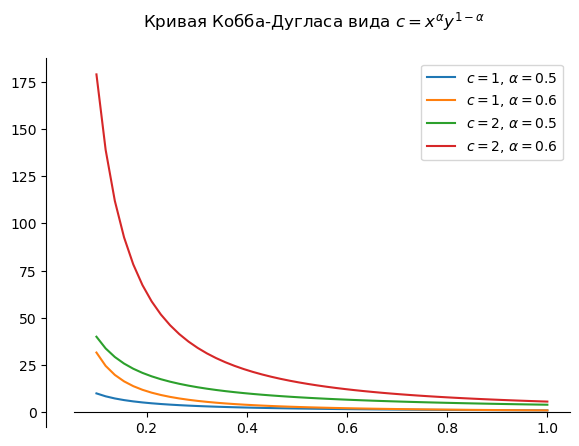

In [16]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def plot_Cobb_Douglas(c_values, alpha_values):
    x_values = np.linspace(0.1, 1) # Массив из 50 точек от 0.1 до 1

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Кобба-Дугласа вида $c = x^{\\alpha}y^{1-\\alpha}$") # Двойные слеши нужны, чтобы не экранировать следующий символ
    
    for c in c_values:
        for alpha in alpha_values:
            y_values = [Cobb_Douglas(x, c, alpha) for x in x_values]    
            ax.plot(x_values, y_values, label=f"$с = {c}$, $\\alpha = {alpha} $")
    

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()
    

c_values = [1, 2]
alpha_values = [0.5, 0.6]
plot_Cobb_Douglas(c_values, alpha_values)

### Поиск и визуализация оптимального решения для функции Кобба-Дугласса

Напишем функцию, которая по информации о двух товарах, бюджете и параметре $\alpha$ функции полезности Кобба-Дугласа найдет оптимальное решение, т.е. точку касания кривой безразличия функции Кобба-Дугласа и границы бюджетного ограничения.

Известно, что решение можно найти по формуле:
$$
\begin{cases}
x_1 = \frac{\alpha}{g1.price}\\
x_2 = \frac{1-\alpha}{g2.price}\\
\end{cases}
$$

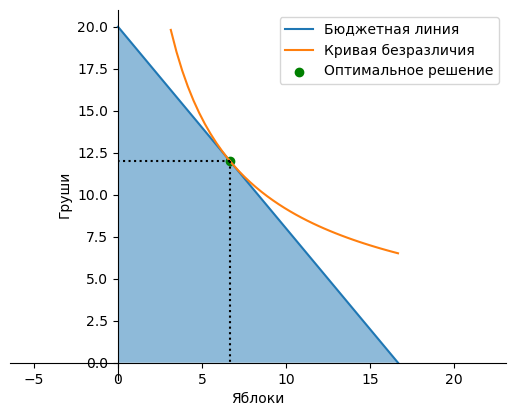

In [17]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

### Интерактивная визуализация оптимального решения для функции Кобба-Дугласа

In [18]:
def interactive_plot(p1, p2, budget, alpha):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

### Параметры функции полезности Леонтьева. <font color="red">Задание 2</font> <a id="task_2"></a>

Напишите код, который визуализирует графики кривых безразличия для функции Леонтьева вида 
$$
с = \min(\frac{x}{a}, \frac{y}{b})
$$
при различных значениях параметров $а$ и $b$.

Для наглядности рассмотрим уовни полезности в $\frac{1}{2}$ и $1$. Зная форму леонтьева будем строить вертикальные и горизонтальных линии из точки оптимума.

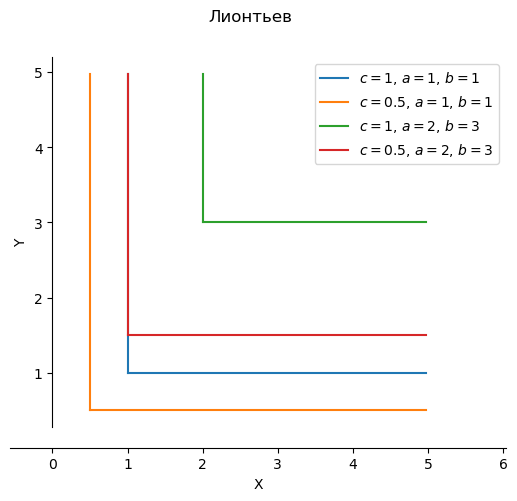

In [19]:
U = [1, 1/2]

def Leontev(a, b, c, x):    #returns optimum coordinate
    if x/a < c:
        return None
    return c * b

def plot_Leontev(a_values, b_values, U = [1]):
    fig, ax = plt.subplots()
    line = np.arange(0, max(a_values) * max(U) + max(b_values) * max(U), min(U)/20)

    #a solution always exists within these limits
    
    fig.suptitle("Лионтьев") 
    
    for i in range(len(a_values)):    
        for c in U:
            y_values = [Leontev(a_values[i], b_values[i], c, x) for x in line]    
            x_values = [Leontev(b_values[i], a_values[i], c, y) for y in line]    
            p = ax.plot(line, y_values)    #plot h lines
            ax.plot(x_values, line, color=p[0].get_color(), label=f"$c = {c}$, $a = {(a_values[i])}$, $b = {(b_values[i])}$")
            
            #plot v lines

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='best')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')






    
a_values = [1, 2]
b_values = [1, 3]
plot_Leontev(a_values, b_values, U)


### Поиск и визуализация оптимального решения для функции полезности Леонтьева. <font color="red">Задание 3</font> <a id="task_3"></a>

Для двух заданных товаров $g1$, $g2$, величины бюджета $budget$, а также параметров $a$ и $b$ функции полезности Леонтьева, найдите оптимальное решение и визуализируйте его.

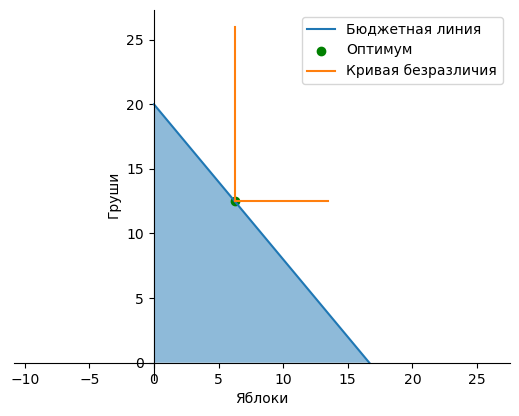

In [20]:
def budget_Leontev_solution(g1, g2, budget, a, b):    #find x_optimum, y_optimum
    x_solution = (a)/(a*g1.price + b*g2.price) * budget
    y_solution = (b)/(a*g1.price + b*g2.price) * budget
    return x_solution, y_solution

def plot_budget_Leontev(g1, g2, budget, a, b):
    
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    #plot budget set
    
    x, y = budget_Leontev_solution(g1, g2, budget, a, b)
    ax.scatter(x, y, color='g', label="Оптимум")
    
    #plot optimum point
    
    p = ax.plot([x, x*2 + 1], [y, y])
    ax.plot([x, x], [y, y*2 + 1], color=p[0].get_color(), label=f"Кривая безразличия")
    
    #plot v and h lines from optimum point
        
    ax.set_xlabel(f"{g1.name}")
    ax.set_ylabel(f"{g2.name}")
    ax.legend(loc='best')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')

    

    


g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
a = 1
b = 2
plot_budget_Leontev(g1, g2, budget, a, b)

### Интерактивная визуализация оптимального решения для функции полезности Леонтьева

In [21]:
def interactive_plot(p1, p2, budget, a, b):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Leontev(g1, g2, budget, a, b);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), a=(1,10), b=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 2

## Описание класса

В данной модели у каждого товара есть три параметра: название, цена и количество такого товара, которое можно получить бесплатно.
Это означает, что потребитель всегда может получить бесплатно товар в заданном количестве, а за каждую следующую единицу товара необходимо заплатить указанную цену.

In [22]:
class Good():
    def __init__(self, name, price, free):
        self.name = name
        self.price = price
        self.free = free # Количество продукта, которое можно получить бесплатно

## Проверка бюджетного ограничения. <font color="red">Задание 4</font><a id="task_4"></a>

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [23]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    x1 = max(0, x1 - g1.free)
    x2 = max(0, x2 - g2.free)

    #give away as much as we can while still having non-negative amounts 
    
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)):
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое представление. <font color="red">Задание 5.</font> <a id="task_5"></a>

Напишите функцию, которая будет изображать бюджетное множество и проверяемую точку.

Для каждой цены мы можем получить $\space \text{price} \cdot x + \text{free}$, соответственно 'сдвинем' бюджетное ограничение.  
Можно считать что мы смещаем точку ($0, 0$) на $(\text{g1.free}, \text{g2.free})$.

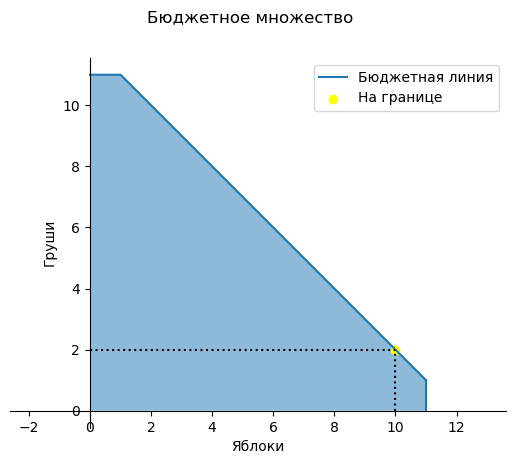

In [24]:
def plot_budget(g1: Good, g2: Good, budget, x1, x2):
    
    
    x_points = [g1.free, budget/g1.price + g1.free] 
    y_points = [budget/g2.price + g2.free, g2.free]
    
    #сместим обычное бюджетное множество
    
    x_points = [0] + x_points
    y_points = [budget/g2.price + g2.free] + y_points
    
    #добавим 'бесплатные' прямоугольники 

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    c = ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5

    ax.plot([x_points[2], x_points[2]], [0, g2.free], color=c[0].get_color())
    
    # Проведем вертикальную линию в части графика, который не является функцией
        
    
    
    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
plot_budget(g1, g2, budget, 10, 2)

## Интерактивное представление

In [25]:
def interactive_plot(p1, f1, p2, f2, budget, x, y):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, p1=(1, 10), f1=(0, 10), p2 = (1, 10), f2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='f1'…

<function __main__.interactive_plot(p1, f1, p2, f2, budget, x, y)>

## Работа с таблицами. <font color="red">Задание 6</font><a id="task_7"></a>

Выполните аналогичные действия, как и с моделью 1, а именно:
* Создайте файл model2_data.xlsx по аналогии с тем, как устроен файл model1_data.xlsx. И добавьте в него как минимум 10 строчек.
* Загрузите данные из таблицы model2_data.xlsx
* Для каждой записи проверьте, выполнено ли бюджетное ограничение.
* Отфильтруйте только те варианты, в которых бюджетное ограничение выполняется (в том числе и на границе).
* Отсортируйте таблицу по столбцу G1_free.
* Результат сохраните в файл model2_result.xlsx

Допускается в этом задании вместо Excel файлов использовать csv файлы.

In [26]:
df = pd.read_excel("model2_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм 

result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов
    
    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price'], row['G1_free']) 
    g2 = Good(row['G2_name'], row['G2_price'], row['G2_free'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result

df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм

df_super = df_super.sort_values(by = 'G1_free') # Сортируем датафрейм и сохраняем в тот же датафрейм

df_super.to_excel("model2_result.xlsx") # Сохраняем 


## Обратная задача. <font color="red">Задание 7</font> <a id="task_7"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 2, т.е. значения __price >0__ и __free >= 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи, по аналогии с тем, как это сделано для Модели 1.

In [27]:

def get_goods_parameters_0(list_of_points):
    ones = np.ones([2,1])

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution


def get_goods_parameters(list_of_points):
    list_of_points = np.array(list_of_points)


    right = list_of_points[list_of_points[:, 0] == max(list_of_points[:, 0])]
    x4 = right[right[:,1] == max(right[:, 1])][0]    # самая верхняя из самых правых точек
    list_of_points_l = list_of_points[list_of_points[:, 0] != max(list_of_points[:, 0])]

        
    f2 = x4[1] #вертикальная линия
        
    if (len(list_of_points_l) > 0):
        left = list_of_points_l[list_of_points_l[:, 1] == max(list_of_points_l[:, 1])] # берем максимумы по y
        y4 = left[left[:,0] == max(left[:, 0])][0]    # самая правая из самых верхних точек
        list_of_points_ll = list_of_points_l[list_of_points_l[:, 1] != max(list_of_points_l[:, 1])]

        f1 = y4[0] #горизонтальная линия
        
        for i in left:    #проверка что функция все еще вогрутая
            if i[1] <= x4[1]:
                return None
        
        list_of_points_ll    #все должны быть на одной линии sol
        
        a = [x4[0] - y4[0], 0]
        b = [0, y4[1] - x4[1]]
        sol = get_goods_parameters_0([a, b])
        p1 = sol[0][0]
        p2 = sol[1][0]
        

        budget = p1 * max(x4[0] - f1, 0) + p2 * max(0, x4[1] - f2)
        for i in list_of_points_ll:    #проверяем оставшиеся точки
            if not is_equal(budget, p1 * max(i[0] - f1, 0) + p2 * max(0, i[1] - f2)):
                return None

    else:
        f1 = 0
        p1 = 1
        p2 = 1
    return p1, p2, f1, f2
        

list_of_points = [
    [5,1],
    [4,2],
    [3,3], 
    [2,4]
]

list_of_points = [
    [8,4],
    [6,6],
    [5,7], 
    [9,3]
]


print(get_goods_parameters(list_of_points))

(0.25, 0.25, 5, 3)


(0.14285714285714285, 0.07142857142857142, 0, 2)


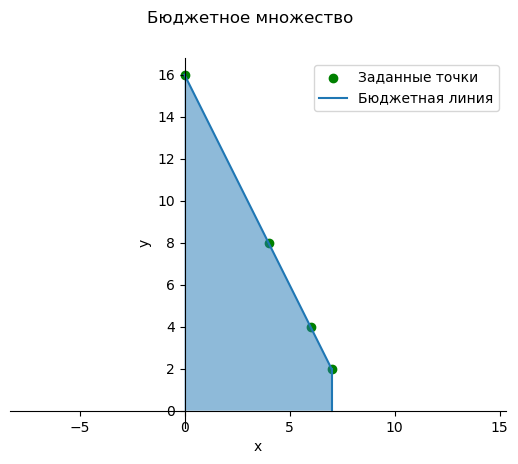

In [28]:

    

def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")
            
    ax.axis('equal') # Принудительно делаем оси равными
    result = get_goods_parameters(list_of_points)
    print(result)
    if not (result is None):
        q1, q2, t1, t2 = result
        g1 = Good('x', q1, t1)
        g2 = Good('y', q2, t2)
        
        budget = g1.price * max(list_of_points[0][0] - g1.free, 0) + g2.price * max(0, list_of_points[0][1] - g2.free)

        fig.suptitle("Бюджетное множество")
        
        
        
        x_points = [g1.free, budget/g1.price + g1.free] 
        y_points = [budget/g2.price + g2.free, g2.free]

        #сместим обычное бюджетное множество

        x_points = [0] + x_points
        y_points = [budget/g2.price + g2.free] + y_points

        #добавим 'бесплатные' прямоугольники 

        c = ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5

        ax.plot([x_points[2], x_points[2]], [0, g2.free], color=c[0].get_color())

        # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()
    
list_of_points = [
    [0,16],
    [4, 8],
    [6, 4], 
    [7,2]
] 



plot_goods_parameters(list_of_points)

In [29]:
def interactive_plot(x11, x12, x21, x22, x31, x32, x41, x42):
    list_of_points = [
        [x11, x12],
        [x21, x22], 
        [x31, x32],
        [x41, x42],
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10), x31=(1, 10), x32 = (1, 10), x41=(1, 10), x42 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

## Кривые безразличия. <font color="red">Задание 8</font> <a id="task_8"></a>

Для двух товаров из Модели 2 и кривой безразличия функции Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Пример работы расположен по [данной ссылке](https://samonenko-econom-practice-example-streamlit-app-yyqr46.streamlit.app/)



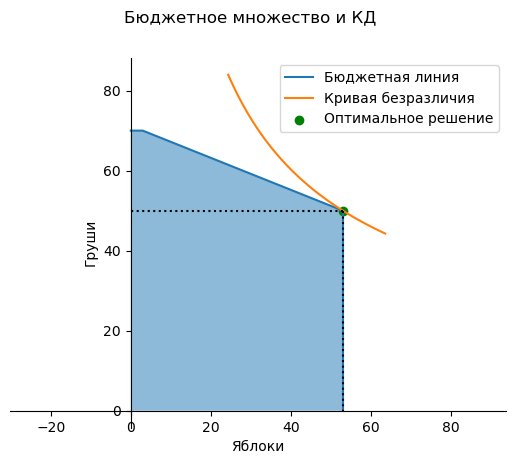

In [30]:

#будем считать что решения не угловые (экономически это так)
#снова сместим снова сместим линейную фунецию на g1.free и g2.free

def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):   
    
    #а тут мы и добавим бесплатные товары
    #просто сделаем вид что они не беспалатные, а нам на них дают субсидии
    #если на товар тратитья меньше размера субсидий то краевой случай
    
    budget += g1.price*g1.free
    budget += g2.price*g2.free
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):    
    x_points = [g1.free, budget/g1.price + g1.free] 
    y_points = [budget/g2.price + g2.free, g2.free]
    
    #сместим обычное бюджетное множество
    
    x_points = [0] + x_points
    y_points = [budget/g2.price + g2.free] + y_points
    
    #добавим 'бесплатные' прямоугольники 

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество и КД")
    
    cl = ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5

    ax.plot([x_points[2], x_points[2]], [0, g2.free], color=cl[0].get_color())
    
    # Проведем вертикальную линию в части графика, который не является функцией
        
        
    #находим оптимум
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    #самое время вспомнить про существование краевых случаев и проверить их
    
    if x_solution > x_points[-1]:
        x_solution = x_points[-1]
        y_solution = y_points[-1]
        c =  math.pow(x_solution, alpha) * math.pow(y_solution, (1 - alpha))
    
    if y_solution > y_points[1]:
        x_solution = x_points[1]
        y_solution = y_points[1]
        c =  math.pow(x_solution, alpha) * math.pow(y_solution, (1 - alpha))

    
    #кривые безразличия
    
    x_values = np.linspace(0.1, (budget/g1.price + g1.free) * 1.2, 200)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    
    
    filter = y_values < (budget/g2.price + g2.free) * 1.2
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 2, 3)
g2 = Good("Груши", 5, 50)
budget = 100
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

In [31]:
def interactive_plt(p1, p2, f1, f2, budget, alpha):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plt, p1=(1, 10), p2 = (1, 10), f1 = (0,10), f2=(0,10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 3

## Описание класса. <font color="red">Задание 9</font> <a id="task_9"></a>

В данной модели у каждого товара есть следующие параметры: определено некоторое пороговое значение threshold, а также две цены - $price_1$ и $price_2$. Если количество купленного товара меньше и равна $threshold$, то каждая его единица стоит $price_1$. А каждая единица товара свыше $threshold$ стоит $price_2$.

Например, если $threshold = 3$, $price_1 = 10$ и $price_2 = 5$, то:
* 2 единицы товара стоят 20,
* 3 единицы товара стоят 30,
* 4 единицы товара стоят 35,
* 5 единиц товара стоят 40.

Создайте класс Good для товаров данной модели. Реализуйте в классе метод price(quantity), который будет находить стоимость x товаров данного вида. Реализуйте в классе метод quantity(budget), который будет находить какое количество данного товара можно приобрести за стоимость budget.

In [32]:
# Создадим класс для товаров модели
epsilon = 10e-8    # избегаем деление на ноль при нулевых ценах (их быть не должно но пусть)

class Good():
    def __init__(self, name, threshold, price1, price2):
        self.name = name
        self.price1 = price1
        self.price2 = price2
        self.threshold = threshold
        
        
    def price(self, x):
        bought = min(self.threshold, x)    #сколько купят по первой цене
        left = max(0, x - self.threshold)    #сколько останется после покупки по первой цене
        return bought * self.price1 + left * self.price2
    
    
    def quantity(self, I):
        if (I - self.threshold * self.price1 > 0): #покупаем по первой цене threshold если можем
            I -= self.price1 * self.threshold
            k = self.threshold
            
            if self.price2 == 0:    #покупаем по второй цене оставшиеся
                k += I / epsilon
            else:
                k += I / self.price2    
        else:
            if self.price1 == 0:    #если можем купить меньше threshold, то покупаем все по первой цене
                k = I / epsilon
            else:
                k = I / self.price1
        return k
    


## Бюджетное ограничение. <font color="red">Задание 10</font> <a id="task_10"></a>

Напишем функцию, которая проверит удовлетворяет ли конкретная точка бюджетным ограничениям.

In [33]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''    
    result = g1.price(x1) + g2.price(x2)
    if (is_equal(result, budget)):    # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое и интерактивное представление. <font color="red">Задание 11.</font> <a id="task_11"></a>

Напишите функцию, которая будет визуализировать бюджетное множество и проверяемую точку, а также по аналогии с предыдущими примерами реализуйте интерактивное представление.

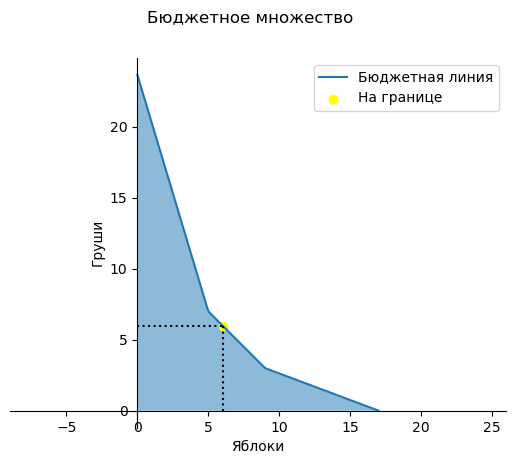

In [34]:
def plot_budget(g1: Good, g2: Good, budget, x1, x2):
     

    
    fig, ax = plt.subplots()
    fig.suptitle("Бюджетное множество")
    
    X = np.linspace(0, g1.quantity(budget), 200)    #задаем простанство x полностью покрывающее бюджет
    Y = []
    for x_ in X:
        Y.append(g2.quantity(budget - g1.price(x_)))
        
    #для всех x решаем y = (I - xp) \ q
    

    c = ax.plot(X, Y, label="Бюджетная линия") 
    ax.fill_between(X, Y, alpha=0.5)    # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    if (g2.price1 == 0):
        ax.plot([X[-1], X[-1]], [0, Y[-1]], color=c[0].get_color())
        
        #Проведем вертикальную линию в части графика, который не является функцией
    
    
    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок

    
g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
plot_budget(g1, g2, budget, 6, 6)

In [35]:
def interactive_plt(t1, t2, p1, p2, q1, q2, budget, x, y):
    g1 = Good("Яблоки", t1, p1, q1)
    g2 = Good("Груши", t2, p2, q2)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plt, t1=(0, 10), t2 = (0, 10), p1=(0, 10), p2 = (0, 10), q1 = (1,10), q2=(1,10), budget=(1,100), x=(0,10), y=(0,10));

interactive(children=(IntSlider(value=5, description='t1', max=10), IntSlider(value=5, description='t2', max=1…

## Обратная задача. <font color="red">Задание 12</font> <a id="task_12"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 3, т.е. значения __threshold > 0__, __price_1 > 0__ и __price_2 > 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи по аналогии с тем, как это сделано для Модели 1.

In [36]:
def get_goods_parameters(list_of_points):

    sorted_points = sorted(list_of_points, key=lambda x: x[1], reverse=True)
    tg = []

    for i in range(3): 
        AB = [sorted_points[i + 1][0] - sorted_points[i][0], sorted_points[i + 1][1] - sorted_points[i][1]]  # находим вектор из A в B
        if AB[0] == 0 and AB[1] == 0:   #это одна точка
            continue
        if AB[0] == 0 or AB[1] == 0:   #точки на одной горизонтали или вертикали -> наша функция не работает при p1 > 0
            return None
        else:
            last = i
            tg_ = -AB[1] / AB[0]    #знак меняем так как поворачиваем векторо на 90 для расчета тангенса
            tg.append(tg_)   
            if tg_ < 0:    #точка с меньшим x ниже
                return None
            

    if len(tg) == 3:   #ну раз точки все разные то по-другому и быть не может
        q2 = 1    #слишком много степеней свободы зафиксируем одну
        q1 = q2 * tg[1]
        t1 = sorted_points[1][0]
        t2 = sorted_points[2][1]
        p1 = q2 * tg[0]
        p2 = q1 / tg[2]
    if len(tg) == 2:
        q2 = 1
        p1 = q1 = q2 * tg[0]
        t2 = sorted_points[last][1]
        p2 = q1 / tg[1]
        budget = sorted_points[0][0] * q1 + sorted_points[0][1] * q2 - t2*q2 + t2*p2
        t1 = budget/q1
    if len(tg) == 1:
        p2 = q2 = 1
        p1 = q1 = p2 * tg[0]
        budget = sorted_points[0][0] * p1 + sorted_points[0][1] * p2
        t1 = budget/p1
        t2 = budget/p2
    if len(tg) == 0:
        p1 = 1
        p2 = 1
        q1 = 1
        q2 = 1
        budget = sorted_points[3][0] + sorted_points[3][1]
        t1 = budget
        t2 = budget
    return t1, t2, p1, p2, q1, q2

list_of_points = [[1, 10], [2, 2], [2, 2], [10, 1]]
print(get_goods_parameters(list_of_points))


(18.0, 2, 8.0, 64.0, 8.0, 1)


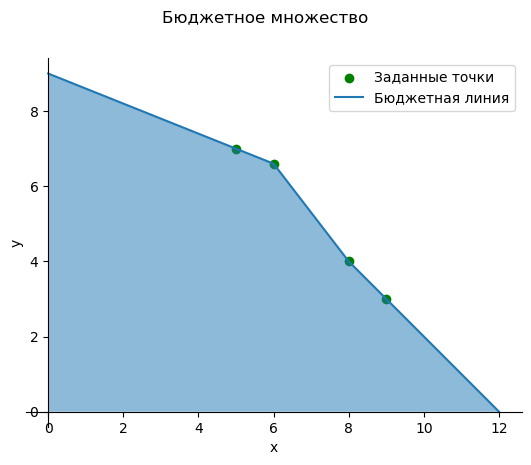

In [37]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")
            
    ax.axis('equal')    # Принудительно делаем оси равными
    result = get_goods_parameters(list_of_points)     # получаем коэффициенты
  
    if not (result is None):
        t1, t2, p1, p2, q1, q2 = result
        g1 = Good('x', t1, p1, q1)
        g2 = Good('y', t2, p2, q2)
        
        budget = g1.price(list_of_points[0][0]) + g2.price(list_of_points[0][1])

        fig.suptitle("Бюджетное множество")
        
        
        
        X = np.linspace(0, g1.quantity(budget), 200)    # задаем простанство x полностью покрывающее бюджет
        Y = []
        for x_ in X:
            Y.append(g2.quantity(budget - g1.price(x_)))

        # для всех x решаем y = (I - xp) \ q


        c = ax.plot(X, Y, label="Бюджетная линия") 
        ax.fill_between(X, Y, alpha=0.5)    # Заливаем область под графиком с прозрачностью (alpha) 0.5

        if (g2.price1 == 0):
            ax.plot([X[-1], X[-1]], [0, Y[-1]], color=c[0].get_color())

        #Проведем вертикальную линию в части графика, который не является функцией

        # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()
    
list_of_points = [
    [8,4],
    [6,6.6],
    [5,7], 
    [9,3]
]   
plot_goods_parameters(list_of_points)

In [38]:
def interactive_plot(x11, x12, x21, x22, x31, x32, x41, x42):
    list_of_points = [
        [x11, x12],
        [x21, x22], 
        [x31, x32],
        [x41, x42],
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10), x31=(1, 10), x32 = (1, 10), x41=(1, 10), x42 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

## Кривые безразличия. <font color="red">Задание 13</font> <a id="task_13"></a>

Для двух товаров из Модели 3 и кривой безразличия функции полезности Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Опишите, чем качественно ситуация с Моделью 3 отличается от ситуации с Моделями 1 и 2. Приведите примеры параметров Модели 3, которые демонстрируют данные различия.

Качественное отличие в том, что в данной модели могут быть неприятные краивые решения и несколько точек оптимума.
Например при A = [[1, 10], [2, 2], [2, 2], [10, 1]]. t, p, q = [18.0, 2, 8.0, 20.0, 8.0, 1]

Я всегда буду искать только одну для общности

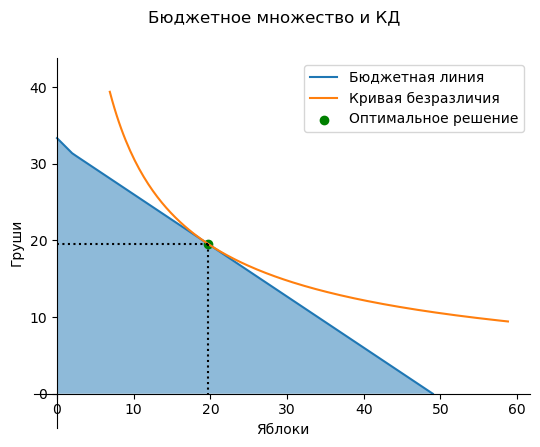

In [39]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def iterate_Cobb_Douglas(x_solution, y_solution, alpha=0.5):   
    c =  math.pow(x_solution, alpha) * math.pow(y_solution, (1 - alpha))
    return c

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество и КД")
    X = np.linspace(0, g1.quantity(budget), 200)    # задаем простанство x полностью покрывающее бюджет
    Y = []
    for x_ in X:
        Y.append(g2.quantity(budget - g1.price(x_)))
        
    # для всех x решаем y = (I - xp) \ q


    lb = ax.plot(X, Y, label="Бюджетная линия") 
    ax.fill_between(X, Y, alpha=0.5)    # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    if (g2.price1 == 0):
        ax.plot([X[-1], X[-1]], [0, Y[-1]], color=lb[0].get_color())
        
        # Проведем вертикальную линию в части графика, который не является функцией
    
        
        
    # находим оптимум
    mx = 0
    x_solution = 0
    y_solution = 0
    for i in range(len(X)):    #брутфорсим решение, мы же не какие-то экономисты
        if Y[i] < 0:
            continue
        val = iterate_Cobb_Douglas(X[i], Y[i], alpha)
        if mx < val:
            mx = val
            x_solution = X[i]
            y_solution = Y[i]

    
    # кривые безразличия
    
    x_values = np.linspace(0.1, X[-1] * 1.2, 200)
    y_values = np.array([Cobb_Douglas(x, mx, alpha) for x in x_values])
    
    
    filter = y_values < (Y[0]) * 1.2
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 2, 3, 2)
g2 = Good("Груши", 5, 3, 3)
budget = 100
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

In [40]:
def interactive_plt(t1, t2, p1, p2, q1, q2, budget, alpha):
    g1 = Good("Яблоки", t1, p1, q1)
    g2 = Good("Груши", t2, p2, q2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plt, t1=(0, 20), t2 = (0, 20), p1=(1, 20), p2 = (1, 20), q1 = (1,20), q2=(1,20), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=10, description='t1', max=20), IntSlider(value=10, description='t2', max…